Importing Packages 

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

Connecting to the database

In [2]:
# 1. Connect to the SQLite database
conn = sqlite3.connect('../Data/WineQT.db')

# 2. Use pandas to read the table into a DataFrame
df = pd.read_sql_query("SELECT * FROM wine_quality", conn)

# 3. Close the database connection
conn.close()


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
bold_before = "\033[1m" + 'before' + "\033[0m"
bold_after = "\033[1m" + 'after' + "\033[0m"

Finding the number of missing values

In [5]:
print(f'The number of missing values in each column is: \n{df.isna().sum()}')

The number of missing values in each column is: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Reducing the size of each column

In [6]:
print(f'the data type of each column in the table {bold_before} mapping the data types: \n{df.dtypes}')
columns = df.columns
for col in columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')
    elif df[col].dtype == 'int64':
        df[col] = df[col].astype('int8')
print(f'the data type of each column in the table {bold_after} mapping the data types: \n{df.dtypes}')


the data type of each column in the table before mapping the data types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object
the data type of each column in the table after mapping the data types: 
fixed acidity           float16
volatile acidity        float16
citric acid             float16
residual sugar          float16
chlorides               float16
free sulfur dioxide     float16
total sulfur dioxide    float16
density                 float16
pH                      float16
sulphates               float16
alcohol                 float16
quality                    int8
Id                         int8
dtype: 

In [7]:
df.set_index('Id', inplace=True)

In [8]:
print(f'The total number of duplicates in the table {bold_before} dropping duplicates: {df.duplicated(keep=False).sum()}')
df.drop_duplicates(inplace=True)
print(f'The total number of duplicates in the table {bold_after} dropping duplicates: {df.duplicated(keep=False).sum()}')

The total number of duplicates in the table before dropping duplicates: 239
The total number of duplicates in the table after dropping duplicates: 0


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.00000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.289062,0.533203,0.268799,2.525391,0.087158,15.648438,46.34375,0.996582,3.312500,0.656738,10.453125,5.641454
std,1.741211,0.183228,0.196289,1.314453,0.048492,10.171875,33.12500,0.001923,0.157715,0.167603,1.094727,0.811744
min,4.601562,0.119995,0.000000,0.899902,0.012001,1.000000,6.00000,0.990234,2.740234,0.330078,8.398438,3.000000
25%,7.101562,0.389893,0.090027,1.900391,0.070007,7.000000,21.00000,0.995605,3.210938,0.549805,9.500000,5.000000
50%,7.898438,0.520020,0.250000,2.199219,0.078979,13.000000,38.00000,0.996582,3.310547,0.620117,10.203125,6.000000
75%,9.101562,0.645020,0.419922,2.599609,0.090027,21.000000,62.00000,0.998047,3.400391,0.720215,11.203125,6.000000
max,15.898438,1.580078,1.000000,15.500000,0.610840,68.000000,289.00000,1.003906,4.011719,2.000000,14.898438,8.000000


Standard Scaling without using Scikit-learn package and just by Numpy
: (x- μ)/σ

In [10]:
columns_need_processing = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
for col in columns_need_processing:
    X = df[col]
    std = np.std(X, axis=0)
    mean = np.mean(X, axis=0)
    df[col] = (X - mean) / std

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,-0.000334,0.533203,0.268799,-0.000778,0.087158,-0.000062,-0.000616,0.996582,3.312500,0.656738,-0.000818,5.641454
std,1.000000,0.183228,0.196289,1.000000,0.048492,1.000000,1.000977,0.001923,0.157715,0.167603,1.000977,0.811744
min,-2.119141,0.119995,0.000000,-1.236328,0.012001,-1.440430,-1.218750,0.990234,2.740234,0.330078,-1.878906,3.000000
25%,-0.682617,0.389893,0.090027,-0.475586,0.070007,-0.850098,-0.765625,0.995605,3.210938,0.549805,-0.871582,5.000000
50%,-0.224487,0.520020,0.250000,-0.248169,0.078979,-0.260254,-0.252197,0.996582,3.310547,0.620117,-0.228516,6.000000
75%,0.466797,0.645020,0.419922,0.056458,0.090027,0.525879,0.473145,0.998047,3.400391,0.720215,0.685547,6.000000
max,4.371094,1.580078,1.000000,9.875000,0.610840,5.144531,7.332031,1.003906,4.011719,2.000000,4.062500,8.000000


In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.236787,0.668122,0.173720,0.102447,-0.152569,-0.100721,0.679023,-0.692521,0.181264,-0.077719,0.115807
volatile acidity,-0.236787,1.000000,-0.542454,-0.008658,0.051316,-0.007602,0.071840,0.032720,0.226117,-0.280577,-0.207401,-0.409326
citric acid,0.668122,-0.542454,1.000000,0.178334,0.246842,-0.048503,0.047937,0.360710,-0.553310,0.347896,0.102116,0.241566
residual sugar,0.173720,-0.008658,0.178334,1.000000,0.058384,0.146914,0.188504,0.363514,-0.121033,0.006774,0.070791,0.022705
chlorides,0.102447,0.051316,0.246842,0.058384,1.000000,0.014600,0.044938,0.208233,-0.277597,0.392925,-0.234312,-0.122215
free sulfur dioxide,-0.152569,-0.007602,-0.048503,0.146914,0.014600,1.000000,0.661143,-0.046986,0.051124,0.031830,-0.060854,-0.071072
total sulfur dioxide,-0.100721,0.071840,0.047937,0.188504,0.044938,0.661143,1.000000,0.052859,-0.070960,0.004919,-0.197994,-0.182197
density,0.679023,0.032720,0.360710,0.363514,0.208233,-0.046986,0.052859,1.000000,-0.363042,0.133977,-0.507252,-0.186095
pH,-0.692521,0.226117,-0.553310,-0.121033,-0.277597,0.051124,-0.070960,-0.363042,1.000000,-0.192954,0.230883,-0.057403
sulphates,0.181264,-0.280577,0.347896,0.006774,0.392925,0.031830,0.004919,0.133977,-0.192954,1.000000,0.096237,0.257534


<Axes: >

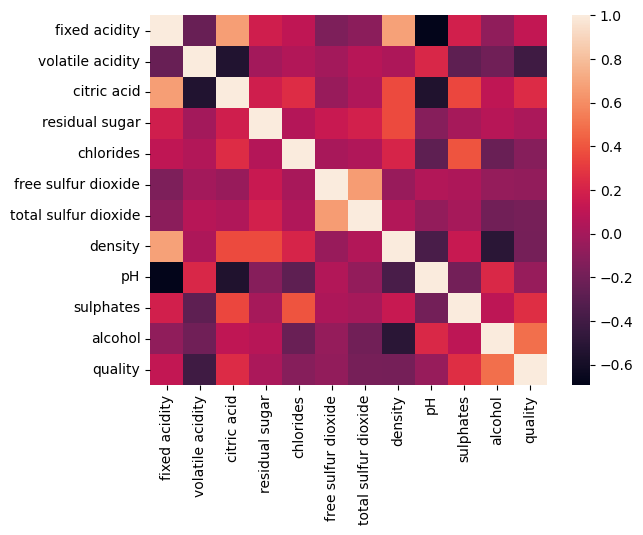

In [13]:
sns.heatmap(df.corr())

In [14]:
feature = df.iloc[:, :-1]
target = pd.DataFrame(df.iloc[:, -1])

Split the feature and target from data frame

In [15]:
feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,-0.511719,0.700195,0.000000,-0.475586,0.075989,-0.457031,-0.373047,0.997559,3.509766,0.560059,-0.964355
1,-0.280518,0.879883,0.000000,0.056458,0.098022,0.919434,0.624023,0.996582,3.199219,0.680176,-0.600098
2,-0.280518,0.759766,0.040009,-0.170898,0.091980,-0.063721,0.231323,0.997070,3.259766,0.649902,-0.600098
3,1.674805,0.280029,0.560059,-0.475586,0.075012,0.132812,0.412598,0.998047,3.160156,0.580078,-0.600098
5,-0.511719,0.660156,0.000000,-0.552246,0.075012,-0.260254,-0.191650,0.997559,3.509766,0.560059,-0.964355


In [16]:
target.head()

,quality
Id,
0,5
1,5
2,5
3,6
5,5


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

In [24]:
print(f'feature size: {feature.size}, x_train size: {x_train.size}, x_test size: {x_test.size}')

feature size: 11198, x_train size: 8954, x_test size: 2244
